In [1]:
%load_ext autoreload
%autoreload 2

import os
from jax import config
config.update("jax_enable_x64", True)

os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID" 
os.environ["CUDA_VISIBLE_DEVICES"] = '0'
from encoding_information.gpu_utils import limit_gpu_memory_growth
limit_gpu_memory_growth()

from encoding_information.datasets import BSCCMDataset, MNISTDataset, CFADataset
import jax.numpy as np
from cleanplots import *

2024-09-17 10:32:14.964939: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-17 10:32:15.786899: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2024-09-17 10:32:15.786980: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2024-09-17 10:32:15.786988: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.


IndentationError: unexpected indent (cfa_dataset.py, line 116)

In [2]:
# dataset = BSCCMDataset('/home/hpinkard_waller/data/BSCCM/')
dataset = MNISTDataset()
# dataset = CFADataset('/home/hpinkard_waller/data/four_channel_images.zarr', 32, None)

measurements = dataset.get_measurements(100)

NameError: name 'MNISTDataset' is not defined

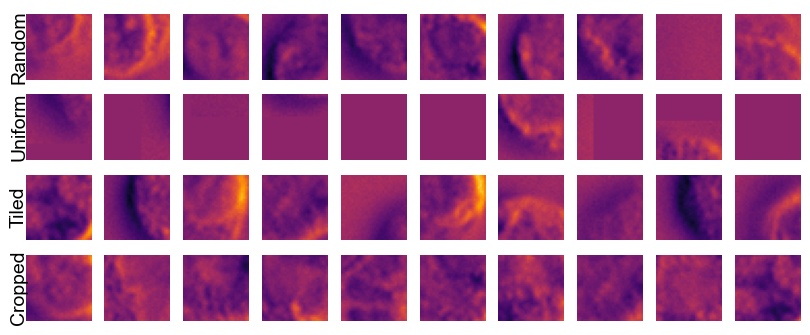

In [20]:
from encoding_information import extract_patches

num_patches = 10
patch_size = 32

    # valid_strategies = ['random', 'uniform_random', 'tiled', 'cropped', 'masked']

random_patches = extract_patches(measurements, num_patches, patch_size, strategy='random')
random_uniform_patches = extract_patches(measurements, num_patches, patch_size, strategy='uniform_random')
tiled_patches = extract_patches(measurements, num_patches, patch_size, strategy='tiled')
cropped_patches = extract_patches(measurements, num_patches, patch_size, strategy='cropped')
masked_patches = extract_patches(measurements, num_patches, patch_size, strategy='masked')


vmin, vmax = np.min(measurements), np.max(measurements)
# plot a row for each strategy (then plot masked separately)

fig, ax = plt.subplots(4, num_patches, figsize=(num_patches, 4))
for i in range(num_patches):
    ax[0, i].imshow(random_patches[i], vmin=vmin, vmax=vmax, cmap='inferno')
    ax[1, i].imshow(random_uniform_patches[i], vmin=vmin, vmax=vmax, cmap='inferno')
    ax[2, i].imshow(tiled_patches[i], vmin=vmin, vmax=vmax, cmap='inferno')
    ax[3, i].imshow(cropped_patches[i], vmin=vmin, vmax=vmax, cmap='inferno')
    ax[0, i].axis('off')
    ax[1, i].axis('off')
    ax[2, i].axis('off')
    ax[3, i].axis('off')

# annotate each strategy by
for i, (ax, name) in enumerate(zip(ax[:, 0], ['Random', 'Uniform', 'Tiled', 'Cropped'])):
    ax.text(-0.1, 0.5, name,  transform=ax.transAxes, rotation=90, va='center', ha='center')
